In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,cache_dir='.', untar=True)

# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
#Converting UniversalPath to LocalPath 
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/2608937632_cfd93bc7cd.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4556178143_e0d32c0a86_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3465599902_14729e2b1b_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4598938531_9749b3b56a.jpg')]

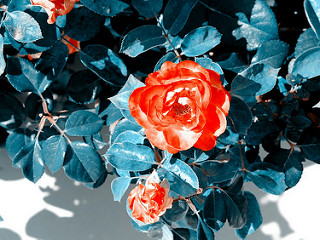

In [ ]:
roses = list(data_dir.glob('roses/*'))
# PIL.Image.open(str(roses[5]))     Used to render the image from the directory.
rs =cv2.imread(str(roses[5]))        #Convert image into numpy array 
cv2_imshow(rs)

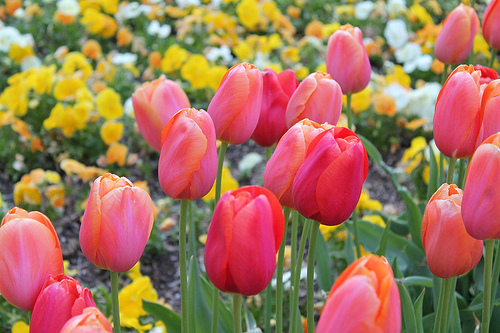

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [ ]:
#Creating Labels dictionary for y.
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/18760363474_a707331322_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1392579828_ab5a139052.jpg'),
 PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2448812029_047d981092_m.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[207, 153, 253],
        [159, 169, 253],
        [178, 169, 249],
        ...,
        [166, 152, 194],
        [168, 147, 196],
        [199, 163, 247]],

       [[179, 179, 243],
        [127, 194, 239],
        [140, 192, 229],
        ...,
        [  9,   3,   0],
        [  5,   0,   0],
        [167, 152, 180]],

       [[183, 175, 240],
        [131, 190, 236],
        [144, 191, 229],
        ...,
        [ 15,  17,  41],
        [  5,   3,  23],
        [170, 151, 200]],

       ...,

       [[176, 158, 219],
        [129, 148, 155],
        [134, 159, 169],
        ...,
        [222, 214, 197],
        [217, 213, 188],
        [204, 173, 236]],

       [[182, 157, 213],
        [ 90, 104,  92],
        [116, 130, 128],
        ...,
        [212, 196, 173],
        [208, 197, 165],
        [208, 169, 224]],

       [[195, 160, 240],
        [168, 156, 198],
        [172, 149, 217],
        ...,
        [202, 176, 240],
        [189, 175, 211],
        [194, 156, 255]]

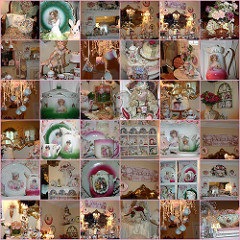

In [ ]:
cv2_imshow(img)        #cv2.imwshow() causing error in the notebook,replacing cv2.imshow with cv2_imshow with same functionality.

In [ ]:
img.shape

(240, 240, 3)

In [ ]:
#Resizing images to particular scale to increase model performance
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
#Splitting the data into X and Y 
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
type(X)

list

In [ ]:
X =np.array(X)
y =np.array(y)

In [ ]:
#PErforming train test split for X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Preprocessing Scaling Images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
#CNN 
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 69s 789ms/step - loss: 1.5479 - accuracy: 0.3250
Epoch 2/10
86/86 [==============================] - 68s 786ms/step - loss: 1.0508 - accuracy: 0.5637
Epoch 3/10
86/86 [==============================] - 68s 787ms/step - loss: 0.8511 - accuracy: 0.6627
Epoch 4/10
86/86 [==============================] - 67s 784ms/step - loss: 0.6744 - accuracy: 0.7483
Epoch 5/10
86/86 [==============================] - 68s 792ms/step - loss: 0.4191 - accuracy: 0.8447
Epoch 6/10
86/86 [==============================] - 68s 792ms/step - loss: 0.2359 - accuracy: 0.9254
Epoch 7/10
86/86 [==============================] - 68s 793ms/step - loss: 0.1472 - accuracy: 0.9552
Epoch 8/10
86/86 [==============================] - 68s 794ms/step - loss: 0.0625 - accuracy: 0.9853
Epoch 9/10
86/86 [==============================] - 68s 793ms/step - loss: 0.0641 - accuracy: 0.9804
Epoch 10/10
86/86 [==============================] - 68s 795ms/step - loss: 0.0429 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 235ms/step - loss: 0.7458 - accuracy: 0.7266


[0.7457826733589172, 0.7265795469284058]

**Here we see that while train accuracy is very high (98%), the test accuracy is significantly low (72%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[-8.3279104e+00,  1.6575722e+01, -3.9169772e+00,  1.1964481e+00,
        -5.7469215e-03],
       [ 2.0705170e+01,  3.1589124e-01, -1.2714343e+01, -6.7275271e+00,
         1.2043461e+01],
       [-2.1175752e+00,  2.8131375e+00,  9.0816641e+00, -9.1832533e+00,
        -1.9149318e+00],
       ...,
       [-2.2897398e+00, -9.2494249e+00,  4.6754227e+00,  9.9000216e+00,
        -3.4890790e+00],
       [ 1.7798389e+01, -1.3520959e-01, -1.3348863e+01, -6.7892842e+00,
         7.3635325e+00],
       [-1.2370700e+00, -1.1066245e+01,  3.6462848e+00,  5.6481290e+00,
        -7.2533512e-01]], dtype=float32)

In [ ]:
#Using Softmax function in order to convert predictions to probabilistic values
score = tf.nn.softmax(predictions[1])

In [ ]:
np.argmax(score)

0

In [ ]:
y_test[1]

1

**Using Data Augmentation methods**

In [ ]:
#Sample for Data Augmentation Looks like....
data_augmentation_zoom = keras.Sequential(
  [layers.experimental.preprocessing.RandomZoom(0.9),]
)

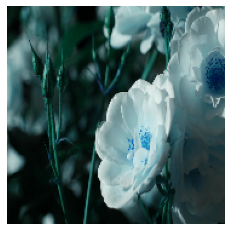

In [ ]:
plt.axis('off')
plt.imshow(X[1])

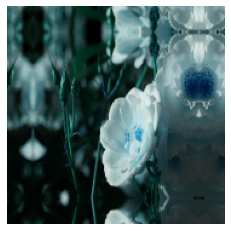

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation_zoom(X)[1].numpy().astype("uint8"))

In [ ]:
#Similarly randomRotation and Flip.
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomContrast(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype("uint8"))

NameError: ignored

**Train the model using data augmentation and a drop out layer**

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 84s 964ms/step - loss: 1.3951 - accuracy: 0.4102
Epoch 2/10
86/86 [==============================] - 82s 959ms/step - loss: 1.0613 - accuracy: 0.5836
Epoch 3/10
86/86 [==============================] - 82s 958ms/step - loss: 0.8986 - accuracy: 0.6522
Epoch 4/10
86/86 [==============================] - 82s 957ms/step - loss: 0.8715 - accuracy: 0.6682
Epoch 5/10
86/86 [==============================] - 82s 957ms/step - loss: 0.7862 - accuracy: 0.7149
Epoch 6/10
86/86 [==============================] - 82s 958ms/step - loss: 0.7384 - accuracy: 0.7128
Epoch 7/10
86/86 [==============================] - 82s 958ms/step - loss: 0.7184 - accuracy: 0.7187
Epoch 8/10
86/86 [==============================] - 82s 957ms/step - loss: 0.6828 - accuracy: 0.7423
Epoch 9/10
86/86 [==============================] - 82s 959ms/step - loss: 0.6547 - accuracy: 0.7533
Epoch 10/10
86/86 [==============================] - 82s 959ms/step - loss: 0.6205 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 236ms/step - loss: 0.7458 - accuracy: 0.7266


[0.7457826733589172, 0.7265795469284058]

**Here you can see test score and training score are marginally equal this indicates appropriate fitting of data.**